In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [25]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
# rename the Income($)	column
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
#drop customer id 
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


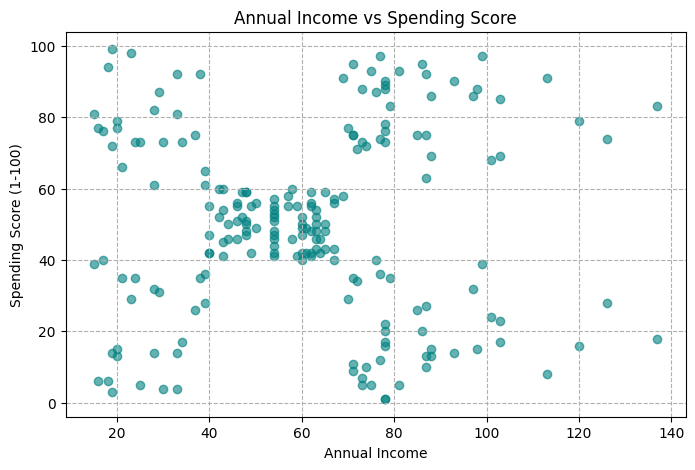

In [ ]:
#scatter plot spending score vs annual income
plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income'], df['Spending Score (1-100)'], c='teal', alpha=0.6)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.grid(axis='both', linestyle='--')
plt.show()


In [37]:
# create new dataframe that consist only annual income and spending score
# Buat dataset baru hanya dengan dua kolom
df_income_spending = df[['Annual Income', 'Spending Score (1-100)']]

# Lihat hasilnya
df_income_spending.head()


,Annual Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### ENCODING 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income           200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

df.head()


,Gender,Age,Annual Income,Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Hasilnya:
Male → 1
Female → 0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income           200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# Data Scaling (Choose One)

In [43]:
# scale dataset with decimal scaling
def decimal_scaling(df):
    normalized_df = df.copy()
    for column in df.columns:
        j = 0
        max_value = abs(df[column]).max()  # pakai absolute supaya aman kalau ada negatif
        while max_value >= 1:
            max_value /= 10
            j += 1
        normalized_df[column] = df[column] / (10 ** j)
    return normalized_df

# Kolom numerik yang mau di-scale
features = ['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)']

# Scale semua kolom numerik
df_decimal_scaled = decimal_scaling(df[features])

# Cek hasil scaling
df_decimal_scaled.head()


,Gender,Age,Annual Income,Spending Score (1-100)
0,0.1,0.19,0.015,0.39
1,0.1,0.21,0.015,0.81
2,0.0,0.20,0.016,0.06
3,0.0,0.23,0.016,0.77
4,0.0,0.31,0.017,0.40


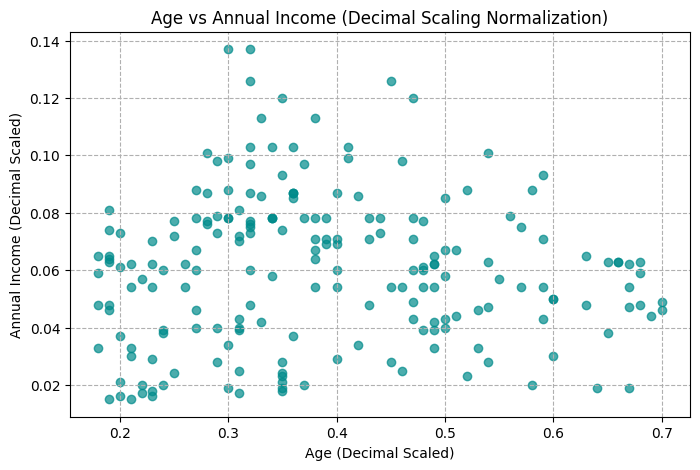

In [ ]:
#Visualization
plt.figure(figsize=(8,5))
plt.scatter(df_decimal_scaled["Age"], df_decimal_scaled["Annual Income"], 
            color='darkcyan', alpha=0.7)

plt.xlabel("Age (Decimal Scaled)")
plt.ylabel("Annual Income (Decimal Scaled)")
plt.title("Age vs Annual Income ")
plt.grid(axis='both', linestyle='--')
plt.show()


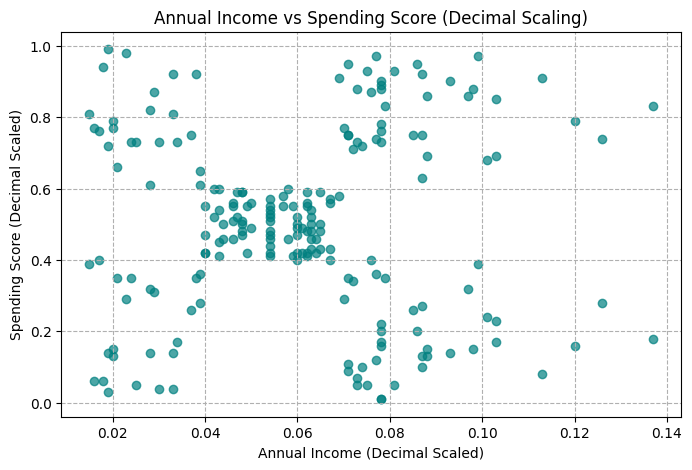

In [45]:
#visualization 
plt.figure(figsize=(8,5))
plt.scatter(df_decimal_scaled["Annual Income"], 
            df_decimal_scaled["Spending Score (1-100)"], 
            color='teal', alpha=0.7)

plt.xlabel("Annual Income (Decimal Scaled)")
plt.ylabel("Spending Score (Decimal Scaled)")
plt.title("Annual Income vs Spending Score (Decimal Scaling)")
plt.grid(axis='both', linestyle='--')
plt.show()


# K-Means Clustering

In [47]:
from sklearn.cluster import KMeans

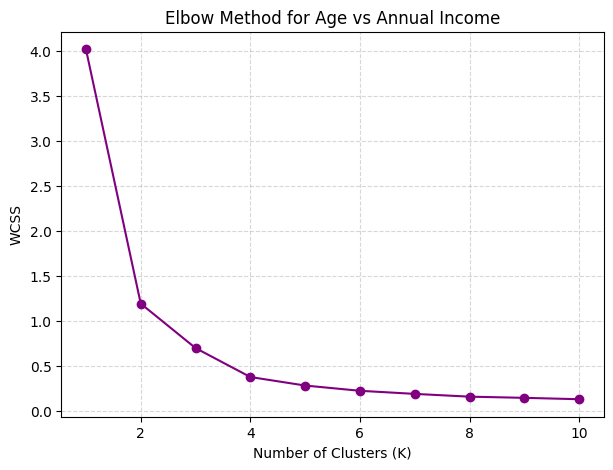

In [48]:
#age vs annual income 
df_age_income = df_decimal_scaled[['Age', 'Annual Income']]

# Elbow method
wcss = []
for i in range(1, 11):   # clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_age_income)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Age vs Annual Income')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


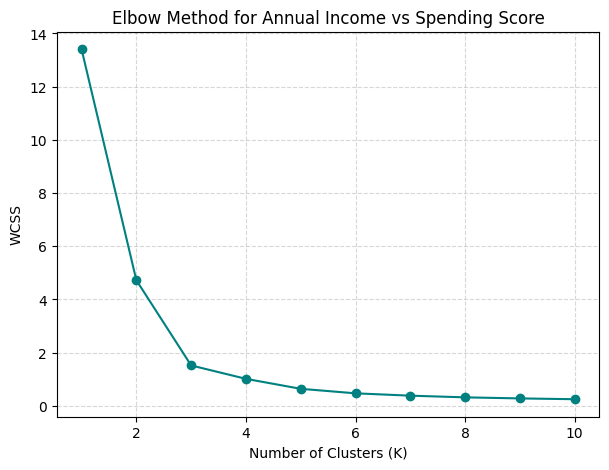

In [50]:
#annual income vs spending score 
df_income_spending = df_decimal_scaled[['Annual Income', 'Spending Score (1-100)']]

# Elbow method
wcss = []
for i in range(1, 11):   # clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_income_spending)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o', color='teal')
plt.title('Elbow Method for Annual Income vs Spending Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# Dataset subset 
df_age_income = df_decimal_scaled[['Age', 'Annual Income']]

# Hitung WCSS untuk K = 1–10
wcss_age_income = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(df_age_income)
    wcss_age_income.append(kmeans.inertia_)

# Buat DataFrame WCSS untuk Age vs Annual Income
wcss_table_age_income = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss_age_income
})

# Tampilkan tabel
print("WCSS Table - Age vs Annual Income")
print(wcss_table_age_income)


WCSS Table - Age vs Annual Income
   Number of Clusters      WCSS
0                   1  4.020427
1                   2  1.191088
2                   3  0.696709
3                   4  0.374577
4                   5  0.279911
5                   6  0.221427
6                   7  0.186957
7                   8  0.156181
8                   9  0.143032
9                  10  0.127651


In [57]:
# Dataset subset (pastikan nama kolom cocok)
df_income_spending = df_decimal_scaled[['Annual Income', 'Spending Score (1-100)']]

# Hitung WCSS untuk K = 1–10
wcss_income_spending = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(df_income_spending)
    wcss_income_spending.append(kmeans.inertia_)

# Buat DataFrame WCSS untuk Annual Income vs Spending Score
wcss_table_income_spending = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss_income_spending
})

# Tampilkan tabel
print("WCSS Table - Annual Income vs Spending Score")
print(wcss_table_income_spending)


WCSS Table - Annual Income vs Spending Score
   Number of Clusters       WCSS
0                   1  13.407677
1                   2   4.722788
2                   3   1.519781
3                   4   1.016196
4                   5   0.641091
5                   6   0.471475
6                   7   0.383223
7                   8   0.320268
8                   9   0.280280
9                  10   0.249866


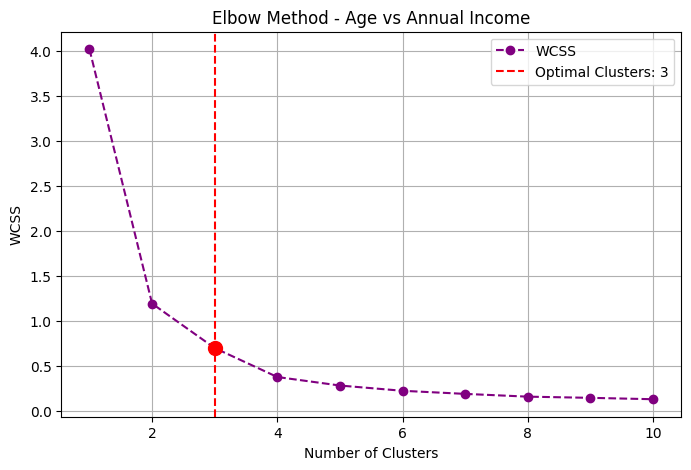

Optimal number of clusters (Age vs Annual Income): 3


In [59]:
# Cluster range
clusters = range(1, 11)

# Gunakan hasil WCSS dari Age vs Annual Income
knee_locator_age_income = KneeLocator(clusters, wcss_age_income, curve="convex", direction="decreasing")
optimal_clusters_age_income = knee_locator_age_income.knee

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss_age_income, marker='o', linestyle='--', color='purple', label="WCSS")
plt.axvline(optimal_clusters_age_income, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters_age_income}')
plt.scatter(optimal_clusters_age_income, wcss_age_income[optimal_clusters_age_income-1],
            c='red', s=100, zorder=5)
plt.title('Elbow Method - Age vs Annual Income')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters (Age vs Annual Income): {optimal_clusters_age_income}")

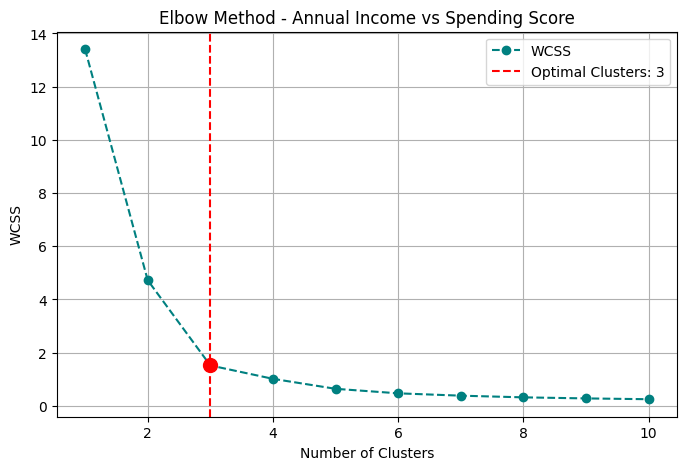

Optimal number of clusters (Annual Income vs Spending Score): 3


In [60]:
# Cluster range
clusters = range(1, 11)

# Gunakan hasil WCSS dari Annual Income vs Spending Score
knee_locator_income_spending = KneeLocator(clusters, wcss_income_spending, curve="convex", direction="decreasing")
optimal_clusters_income_spending = knee_locator_income_spending.knee

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss_income_spending, marker='o', linestyle='--', color='teal', label="WCSS")
plt.axvline(optimal_clusters_income_spending, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters_income_spending}')
plt.scatter(optimal_clusters_income_spending, wcss_income_spending[optimal_clusters_income_spending-1],
            c='red', s=100, zorder=5)
plt.title('Elbow Method - Annual Income vs Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters (Annual Income vs Spending Score): {optimal_clusters_income_spending}")


In [61]:
print(wcss_table_age_income)
print(wcss_table_income_spending)


   Number of Clusters      WCSS
0                   1  4.020427
1                   2  1.191088
2                   3  0.696709
3                   4  0.374577
4                   5  0.279911
5                   6  0.221427
6                   7  0.186957
7                   8  0.156181
8                   9  0.143032
9                  10  0.127651
   Number of Clusters       WCSS
0                   1  13.407677
1                   2   4.722788
2                   3   1.519781
3                   4   1.016196
4                   5   0.641091
5                   6   0.471475
6                   7   0.383223
7                   8   0.320268
8                   9   0.280280
9                  10   0.249866


### Part D: Modeling with K-Means.

In [62]:
# --- AGE vs ANNUAL INCOME ---

# Dataset subset
df_age_income = df_decimal_scaled[['Age', 'Annual Income']]

# Fit K-Means dengan 3 cluster
kmeans_age_income = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters_age_income = kmeans_age_income.fit_predict(df_age_income)

# Tambahkan hasil cluster ke DataFrame asli
df['Cluster_Age_Income'] = clusters_age_income

# Lihat hasilnya
print("K-Means Clustering for Age vs Annual Income")
df[['Age', 'Annual Income', 'Cluster_Age_Income']].head()


K-Means Clustering for Age vs Annual Income


,Age,Annual Income,Cluster_Age_Income
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1


In [63]:
# --- ANNUAL INCOME vs SPENDING SCORE ---

# Dataset subset
df_income_spending = df_decimal_scaled[['Annual Income', 'Spending Score (1-100)']]

# Fit K-Means dengan 3 cluster (hasil dari KneeLocator kamu)
kmeans_income_spending = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters_income_spending = kmeans_income_spending.fit_predict(df_income_spending)

# Tambahkan hasil cluster ke DataFrame asli
df['Cluster_Income_Spending'] = clusters_income_spending

# Lihat hasilnya
print("K-Means Clustering for Annual Income vs Spending Score")
df[['Annual Income', 'Spending Score (1-100)', 'Cluster_Income_Spending']].head()


K-Means Clustering for Annual Income vs Spending Score


,Annual Income,Spending Score (1-100),Cluster_Income_Spending
0,15,39,0
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,0


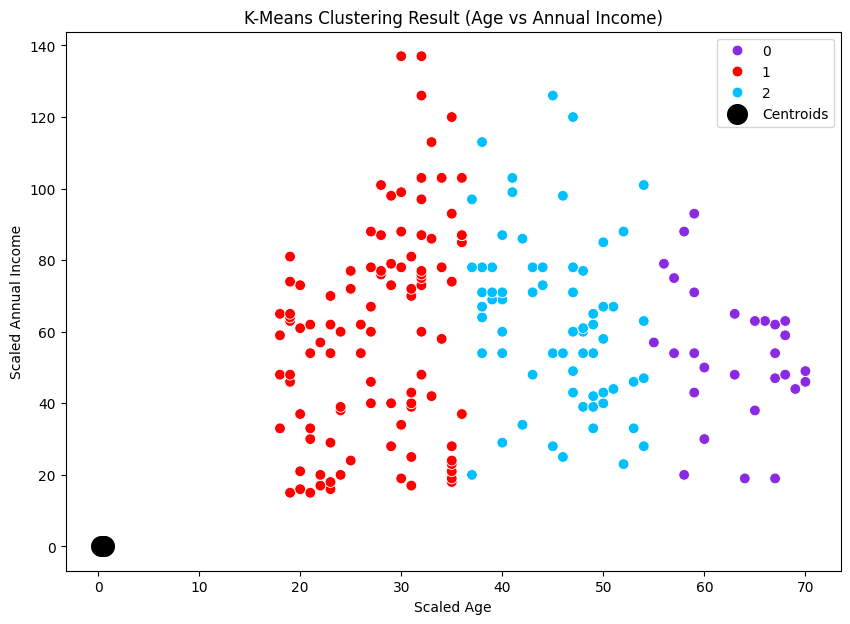

In [64]:
#age vs annual income 
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Age',
    y='Annual Income',
    hue='Cluster_Age_Income',
    palette=['blueviolet', 'red', 'deepskyblue'],
    data=df,
    s=60
)

# Tampilkan titik centroid
plt.scatter(
    kmeans_age_income.cluster_centers_[:, 0],
    kmeans_age_income.cluster_centers_[:, 1],
    s=200,
    c='black',
    label='Centroids'
)

plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("K-Means Clustering Result (Age vs Annual Income)")
plt.legend()
plt.show()


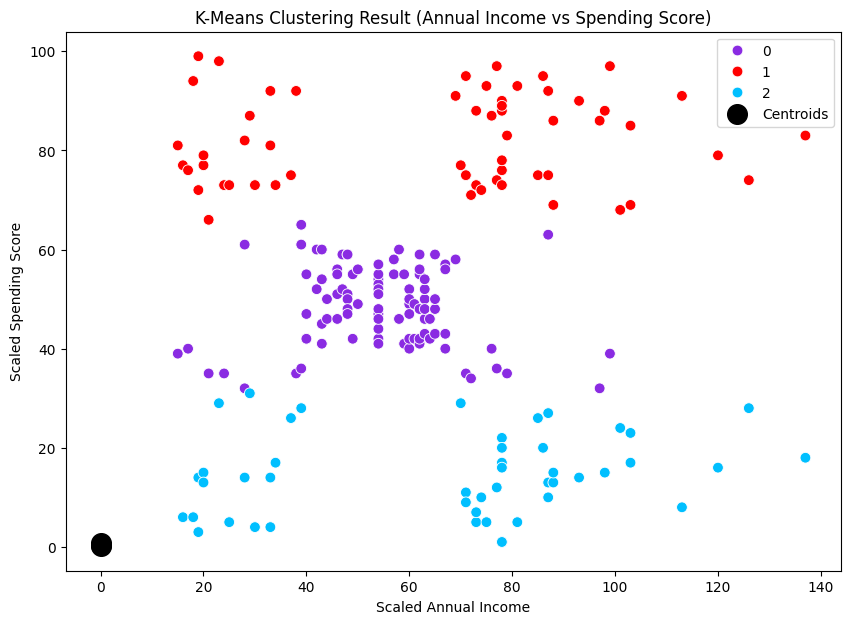

In [65]:
#annual income vs spending score 
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='Annual Income',
    y='Spending Score (1-100)',
    hue='Cluster_Income_Spending',
    palette=['blueviolet', 'red', 'deepskyblue'],
    data=df,
    s=60
)

# Tampilkan titik centroid
plt.scatter(
    kmeans_income_spending.cluster_centers_[:, 0],
    kmeans_income_spending.cluster_centers_[:, 1],
    s=200,
    c='black',
    label='Centroids'
)

plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("K-Means Clustering Result (Annual Income vs Spending Score)")
plt.legend()
plt.show()


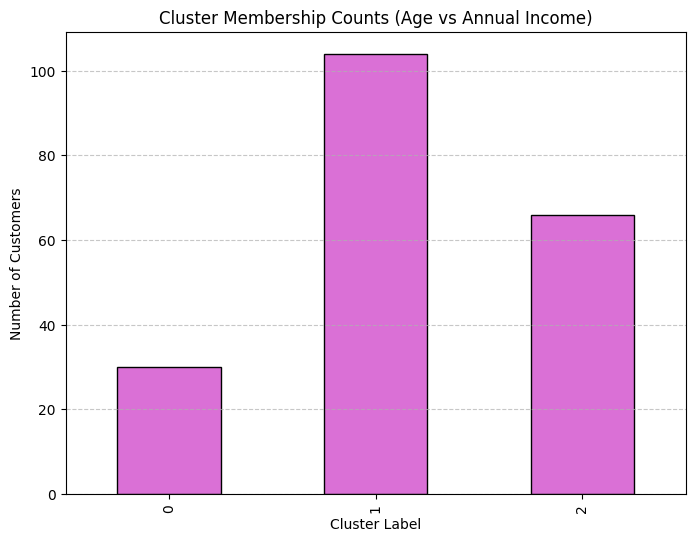

In [66]:
# Hitung jumlah anggota tiap cluster (Age vs Annual Income)
cluster_counts_age_income = df['Cluster_Age_Income'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(8, 6))
cluster_counts_age_income.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Cluster Membership Counts (Age vs Annual Income)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



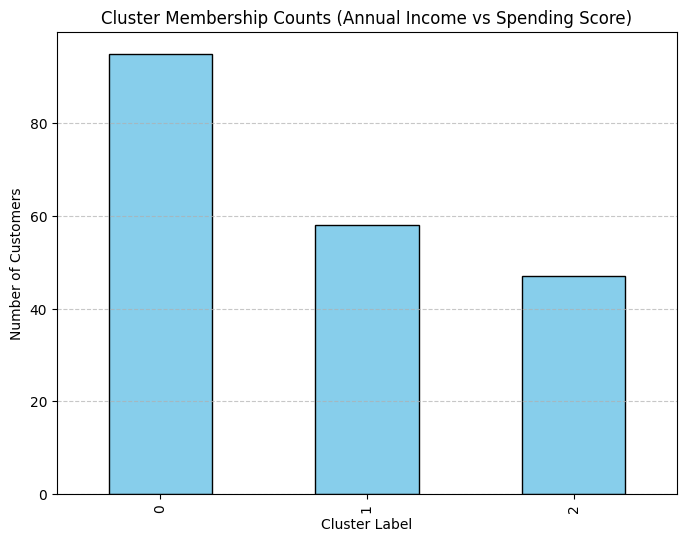

In [67]:
# Hitung jumlah anggota tiap cluster (Annual Income vs Spending Score)
cluster_counts_income_spending = df['Cluster_Income_Spending'].value_counts().sort_index()

# Visualisasi bar chart
plt.figure(figsize=(8, 6))
cluster_counts_income_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts (Annual Income vs Spending Score)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


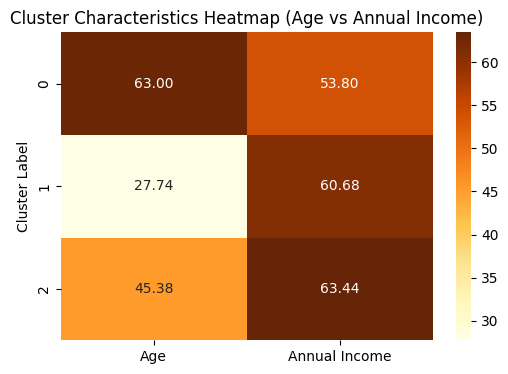

In [70]:
#age vs annual income 
# Hitung rata-rata setiap variabel per cluster
cluster_means_age_income = (
    df.groupby('Cluster_Age_Income')[['Age', 'Annual Income']]
      .mean()
      .round(2)
)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cluster_means_age_income, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title("Cluster Characteristics Heatmap (Age vs Annual Income)")
plt.ylabel("Cluster Label")
plt.show()


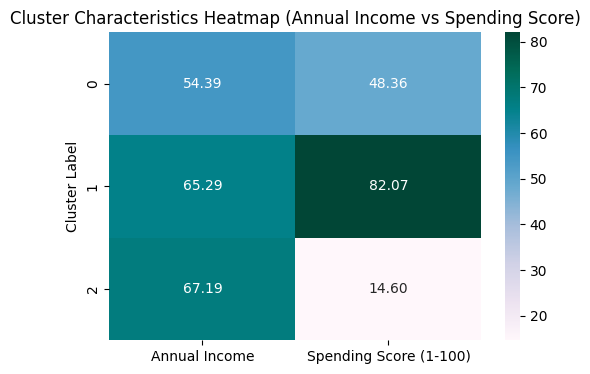

In [72]:
#annual income vs spending score 
# Hitung rata-rata setiap variabel per cluster
cluster_means_income_spending = (
    df.groupby('Cluster_Income_Spending')[['Annual Income', 'Spending Score (1-100)']]
      .mean()
      .round(2)
)

# Visualisasi heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cluster_means_income_spending, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title("Cluster Characteristics Heatmap (Annual Income vs Spending Score)")
plt.ylabel("Cluster Label")
plt.show()


### Part E: Cluster Profiling & Insights

In [68]:
# Group berdasarkan cluster dari Age vs Annual Income
cluster_summary_age_income = (
    df.groupby('Cluster_Age_Income')
      .agg({
          'Age': ['mean', 'min', 'max'],
          'Annual Income': ['mean', 'min', 'max']
      })
      .rename_axis('Cluster_Age_Income')
)

print("Cluster Summary - Age vs Annual Income")
cluster_summary_age_income


Cluster Summary - Age vs Annual Income


Age         Annual Income         
                         mean min max          mean min  max
Cluster_Age_Income                                          
0                   63.000000  55  70     53.800000  19   93
1                   27.740385  18  36     60.682692  15  137
2                   45.378788  37  54     63.439394  20  126

In [69]:
# Group berdasarkan cluster dari Annual Income vs Spending Score
cluster_summary_income_spending = (
    df.groupby('Cluster_Income_Spending')
      .agg({
          'Annual Income': ['mean', 'min', 'max'],
          'Spending Score (1-100)': ['mean', 'min', 'max']
      })
      .rename_axis('Cluster_Income_Spending')
)

print("Cluster Summary - Annual Income vs Spending Score")
cluster_summary_income_spending


Cluster Summary - Annual Income vs Spending Score


Annual Income          Spending Score (1-100)        
                                 mean min  max                   mean min max
Cluster_Income_Spending                                                      
0                           54.389474  15   99              48.357895  32  65
1                           65.293103  15  137              82.068966  66  99
2                           67.191489  16  137              14.595745   1  31

In [74]:
from scipy import stats

# Cluster summary lengkap
cluster_summary_full = df.groupby('Cluster_Income_Spending').agg({
    'Age': ['mean', 'median', lambda x: stats.mode(x, keepdims=True)[0][0], 'min', 'max'],
    'Annual Income': ['mean', 'median', lambda x: stats.mode(x, keepdims=True)[0][0], 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'median', lambda x: stats.mode(x, keepdims=True)[0][0], 'min', 'max'],
    'Gender': lambda x: stats.mode(x, keepdims=True)[0][0]
}).rename_axis('Cluster')

cluster_summary_full

Age                           Annual Income                    \
              mean median <lambda_0> min max          mean median <lambda_0>   
Cluster                                                                        
0        42.221053   43.0         19  18  70     54.389474   54.0         54   
1        30.000000   30.0         30  18  40     65.293103   74.5         78   
2        42.957447   44.0         34  19  67     67.191489   77.0         78   

                 Spending Score (1-100)                             Gender  
        min  max                   mean median <lambda_0> min max <lambda>  
Cluster                                                                     
0        15   99              48.357895   48.0         42  32  65        0  
1        15  137              82.068966   81.0         73  66  99        0  
2        16  137              14.595745   14.0          5   1  31        1

Cluster Profiling & Managerial Implications
(Based on K-Means with K = 3)


Cluster 0 – Mid-Age Moderate Spenders
Profile:
Average age: ~42 years old (range 18–70)
Annual income: ~$54K on average (moderate range)
Spending score: ~48 (balanced spender)
Dominant gender: Female (0)
Customers in a steady career stage with balanced spending habits — not impulsive but consistent

Implications:
Focus on value-for-money products — offer balanced pricing and quality
Marketing tone should emphasize trust, practicality, and reliability
Use email campaigns, loyalty programs, or in-store promotions
Encourage repeat purchases with discounts and cashback programs


Cluster 1 – Young High-Income Shoppers
Profile:
Average age: ~30 years old (range 18–40)
Annual income: ~$65K–$137K range (highest among clusters)
Spending score: ~82, indicating active and impulsive buyers
Dominant gender: Female (0) — likely young professionals who enjoy lifestyle shopping
Tech-savvy, socially active, and motivated by experience and image

Implications:
Target with premium yet trendy products (fashion, lifestyle, gadgets)
Use digital marketing & influencer collaborations — active on social media
Emphasize personalization (customized offers, early product access)
Build brand loyalty through digital rewards and community engagement


Cluster 2 – Older High-Income Low Spenders
Profile:
Average age: ~43 years old (range 19–67)
Annual income: ~$67K (upper-middle bracket)
Spending score: ~14, indicating low spending behavior despite high income
Dominant gender: Male (1)
Likely older professionals, financially stable but cautious and selective in consumption

Implications:
Offer exclusive premium products but emphasize practical value (durability, investment quality)
Use direct marketing or personalized CRM — they respond to trust and expertise
Focus campaigns on security, quality assurance, and long-term benefits
Encourage engagement through premium loyalty programs or invitation-only events


- Summary of Insights
Cluster	Key Segment	Characteristics	Recommended Strategy
0	Mid-age moderate spenders	Balanced lifestyle, female-dominated, stable income	Value & retention campaigns
1	Young high-income spenders	Tech-savvy, social, impulsive shoppers	Premium & digital marketing focus
2	Older high-income low spenders	Mature professionals, selective buyers	Personalized, trust-based campaigns


- Conclusion
The K-Means clustering identified three distinct customer segments with different spending behaviors:
Cluster 0: Mid-age moderate spenders — focus on value and loyalty.
Cluster 1: Young high-income shoppers — focus on lifestyle and digital engagement.
Cluster 2: Older high-income low spenders — focus on exclusivity and trust.
These insights can help the mall’s marketing team design targeted campaigns by combining digital personalization, pricing strategies, and tailored retention programs to maximize engagement, satisfaction, and overall revenue.